In [3]:
library(ISLR)

In [31]:
Data<-ISLR::College

In [8]:
head(Data)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [10]:
tail(Data)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [12]:
summary(Data)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

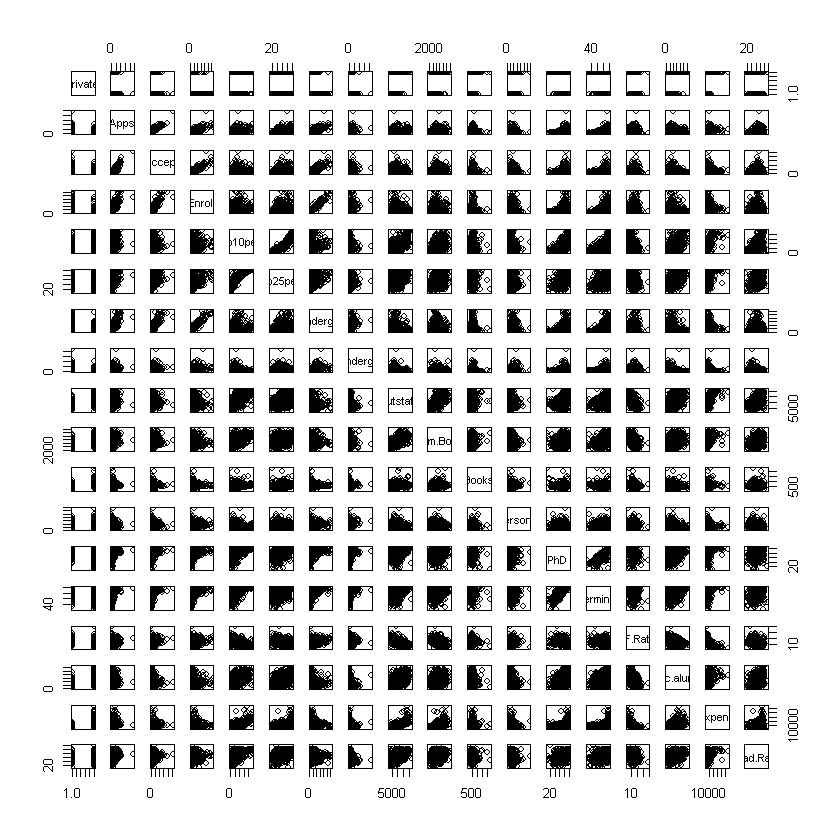

In [14]:
pairs(Data)

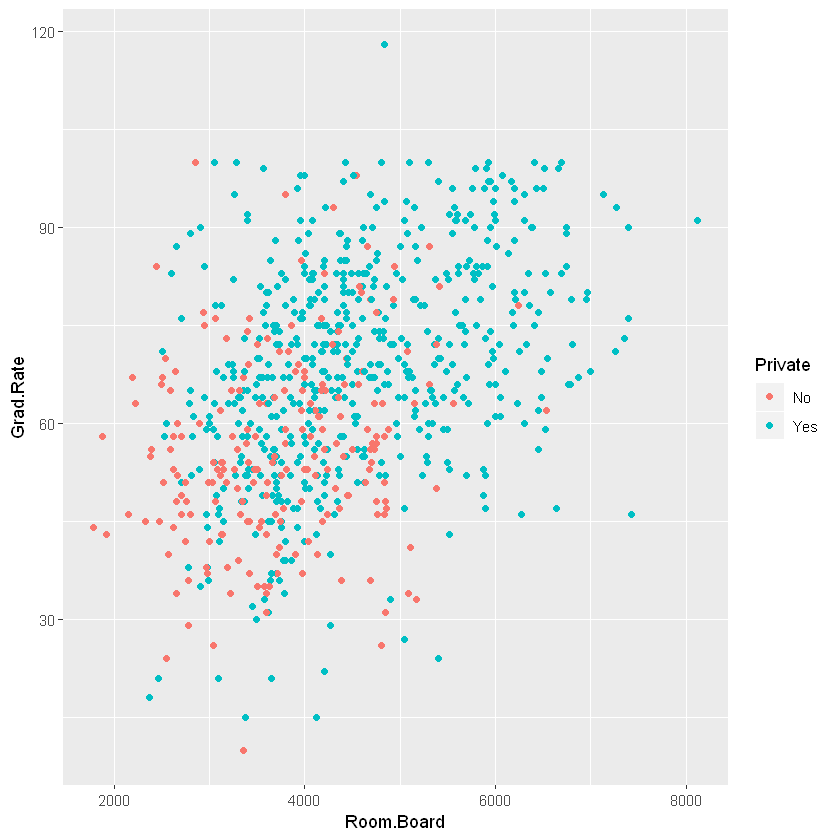

In [39]:
df<-College

#Exploring the data

library(ggplot2)
ggplot(df,aes(Room.Board,Grad.Rate)) + geom_point(aes(color=Private))

In [40]:
dim(df)

[1] 777  18

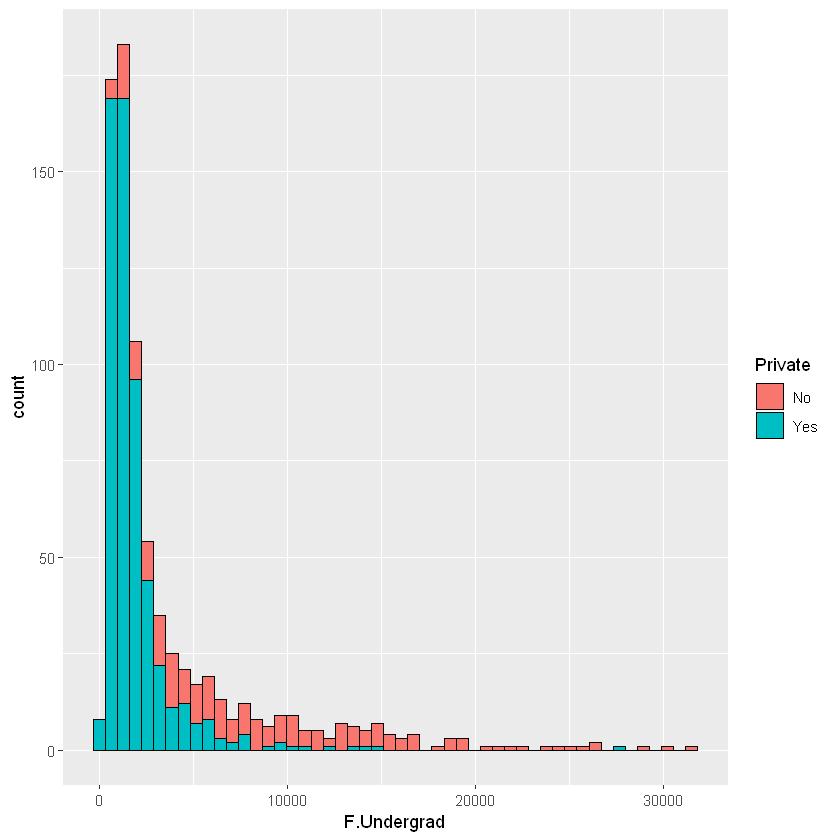

In [41]:
#Create a histogram of full time undergrad students, color by Private.

ggplot(df,aes(F.Undergrad)) + geom_histogram(aes(fill=Private),color='black',bins=50)

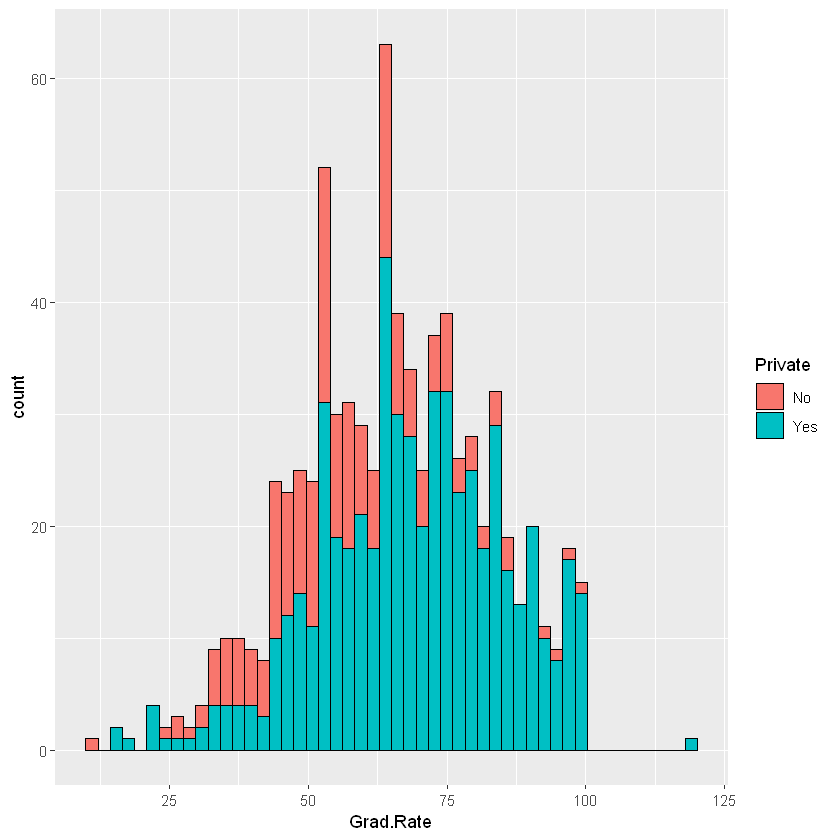

In [42]:
# Create a histogram of Grad.Rate colored by Private. We see something odd here.

ggplot(df,aes(Grad.Rate)) + geom_histogram(aes(fill=Private),color='black',bins=50)

In [44]:
#A college had grad rate above 100, we fix that
subset(df,Grad.Rate > 100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [46]:
df['Cazenovia College','Grad.Rate'] <- 100

In [47]:
install.packages('caTools')

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\reddy\AppData\Local\Temp\RtmpIBaTVf\downloaded_packages


In [49]:
library('caTools')

In [56]:
set.seed(101) 

sample = sample.split(df$Private, SplitRatio = .80)
head(sample)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [57]:
train = subset(df, sample == TRUE)
head(train)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [59]:
test = subset(df, sample == FALSE)
head(test)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Alma College,Yes,1267,1080,385,44,73,1306,28,12572,4552,400,400,79,87,15.3,32,9305,68
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Arkansas College (Lyon College),Yes,708,334,166,46,74,530,182,8644,3922,500,800,79,88,12.6,24,14579,54
Arkansas Tech University,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48


In [64]:
#Decision Tree
library(rpart)

In [65]:
tree <- rpart(Private ~.,method='class',data = train)
tree

n= 622 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 622 170 Yes (0.27331190 0.72668810)  
   2) F.Undergrad>=2992.5 190  55 No (0.71052632 0.28947368)  
     4) Outstate< 10674 135   8 No (0.94074074 0.05925926) *
     5) Outstate>=10674 55   8 Yes (0.14545455 0.85454545)  
      10) F.Undergrad>=9366.5 10   4 No (0.60000000 0.40000000) *
      11) F.Undergrad< 9366.5 45   2 Yes (0.04444444 0.95555556) *
   3) F.Undergrad< 2992.5 432  35 Yes (0.08101852 0.91898148)  
     6) Outstate< 7935 94  34 Yes (0.36170213 0.63829787)  
      12) F.Undergrad>=955 62  30 No (0.51612903 0.48387097)  
        24) Top10perc< 15.5 29   7 No (0.75862069 0.24137931) *
        25) Top10perc>=15.5 33  10 Yes (0.30303030 0.69696970)  
          50) Top25perc>=71 8   2 No (0.75000000 0.25000000) *
          51) Top25perc< 71 25   4 Yes (0.16000000 0.84000000) *
      13) F.Undergrad< 955 32   2 Yes (0.06250000 0.93750000) *
     7) Outstate>=7935 338   1 Yes (0.00295858 0.9

In [67]:
tree$method

[1] "class"

In [76]:
tree$cptable

CP,nsplit,rel error,xerror,xstd
0.47058824,0,1.0000000,1.0000000,0.06538070
0.22941176,1,0.5294118,0.5705882,0.05322570
0.02941176,2,0.3000000,0.3647059,0.04394867
0.02352941,5,0.2117647,0.3764706,0.04457209
0.01176471,6,0.1882353,0.3529412,0.04331115
0.01000000,7,0.1764706,0.3529412,0.04331115


In [78]:
tree$call

rpart(formula = Private ~ ., data = train, method = "class")

In [80]:
tree$terms

Private ~ Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + 
    P.Undergrad + Outstate + Room.Board + Books + Personal + 
    PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate
attr(,"variables")
list(Private, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, 
    P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, 
    Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate)
attr(,"factors")
            Apps Accept Enroll Top10perc Top25perc F.Undergrad P.Undergrad
Private        0      0      0         0         0           0           0
Apps           1      0      0         0         0           0           0
Accept         0      1      0         0         0           0           0
Enroll         0      0      1         0         0           0           0
Top10perc      0      0      0         1         0           0           0
Top25perc      0      0      0         0         1           0           0
F.Undergrad    0      0      0         0      

In [74]:
tree$where

Abilene Christian University 
                                           13 
                           Adelphi University 
                                           15 
                               Adrian College 
                                           15 
                          Agnes Scott College 
                                           15 
                    Alaska Pacific University 
                                           14 
                            Albertson College 
                                           15 
                      Albertus Magnus College 
                                           15 
                               Albion College 
                                           15 
                             Albright College 
                                           15 
                    Alderson-Broaddus College 
                                           15 
                            Allegheny College 
                                           15 
      Allentown Coll. of St. Francis de Sales 
                                           15 
                              Alverno College 
                                           15 
               American International College 
                                           15 
                          Anderson University 
                                           15 
                           Andrews University 
                                           15 
                      Angelo State University 
                                            3 
                           Antioch University 
                                           15 
                              Aquinas College 
                                           15 
         Arizona State University Main campus 
                                            3 
                           Assumption College 
                                           15 
                Auburn University-Main Campus 
                                            3 
                             Augsburg College 
                                           15 
                               Austin College 
                                           15 
                              Averett College 
                                           15 
                             Baker University 
                                           15 
                      Baldwin-Wallace College 
                                           15 
                                Barat College 
                                           15 
                                 Bard College 
                                           15 
                              Barnard College 
                                           15 
                             Barry University 
                                           15 
                            Baylor University 
                                            3 
                           Bellarmine College 
                                           15 
                           Belmont University 
                                           13 
                     Bemidji State University 
                                            3 
                          Benedictine College 
                                           15 
                           Bennington College 
                                           15 
                              Bentley College 
                                            6 
                                Berry College 
                                           15 
                              Bethany College 
                                           15 
                            Bethel College KS 
                                           15 
                               Bethel College 
                                           14 
                  Birmingham-Southern College 
                      

In [83]:
tree$parms

0,1
1,0


In [84]:
tree$control

$minsplit
[1] 20

$minbucket
[1] 7

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 30

$xval
[1] 10

In [87]:
tree$numresp

[1] 4

In [88]:
tree$splits

,count,ncat,improve,index,adj
F.Undergrad,622,1,104.5873565,2992.50,0.0000000
Outstate,622,-1,93.6639261,7997.00,0.0000000
Enroll,622,1,81.1071218,723.00,0.0000000
P.Undergrad,622,1,69.9312282,863.50,0.0000000
S.F.Ratio,622,1,69.1663145,14.85,0.0000000
Enroll,0,1,0.9614148,733.00,0.8736842
Accept,0,1,0.9340836,2039.50,0.7842105
Apps,0,1,0.9067524,3065.50,0.6947368
P.Undergrad,0,1,0.8167203,1309.50,0.4000000
S.F.Ratio,0,1,0.7524116,17.45,0.1894737


In [89]:
tree$variable.importance

F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
 118.324375  100.845797   88.773445   77.123974   68.363681   45.203241 
  S.F.Ratio  Room.Board      Expend   Top10perc   Grad.Rate   Top25perc 
  42.109120   38.847626   30.621466   25.066895   24.286699    9.301330 
perc.alumni         PhD    Terminal 
   3.624964    2.683570    1.582273

In [90]:
tree$y

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 [38] 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2
 [75] 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 1
[149] 2 1 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1
[223] 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 2 2
[260] 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2
[297] 2 2 1 1 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2
[334] 1 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 2
[371] 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
[408] 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1
[445] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1
[482] 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1
[519] 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 1 2 1 1 1 2 1 1 1 2 2 1 1 1 2 2 2 1 1 1 1 1
[556] 1 1 1 1 1 1 2 2 2 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
[593] 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2

In [91]:
tree$ordered

Apps      Accept      Enroll   Top10perc   Top25perc F.Undergrad 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
P.Undergrad    Outstate  Room.Board       Books    Personal         PhD 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
   Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
      FALSE       FALSE       FALSE       FALSE       FALSE

In [93]:
#Use predict() to predict the Private label on the test data.

tree.preds <- predict(tree,test)

head(tree.preds)

,No,Yes
Alfred University,0.00295858,0.99704142
Alma College,0.00295858,0.99704142
Amherst College,0.00295858,0.99704142
Appalachian State University,0.94074074,0.05925926
Arkansas College (Lyon College),0.00295858,0.99704142
Arkansas Tech University,0.94074074,0.05925926


In [95]:
tail(tree.preds)

,No,Yes
Wheeling Jesuit College,0.00295858,0.9970414
Whittier College,0.00295858,0.9970414
Willamette University,0.00295858,0.9970414
Wofford College,0.00295858,0.9970414
Xavier University,0.00295858,0.9970414
Yale University,0.04444444,0.9555556


In [97]:
summary(tree.preds)

       No                Yes         
 Min.   :0.002959   Min.   :0.05926  
 1st Qu.:0.002959   1st Qu.:0.24138  
 Median :0.002959   Median :0.99704  
 Mean   :0.279301   Mean   :0.72070  
 3rd Qu.:0.758621   3rd Qu.:0.99704  
 Max.   :0.940741   Max.   :0.99704  

In [99]:
#Turn these two columns into one column to match the original Yes/No Label for a Private column.

tree.preds <- as.data.frame(tree.preds)

joiner <- function(x){
    if (x>=0.5){
        return('Yes')
    }else{
        return("No")
    }
}
tree.preds$Private <- sapply(tree.preds$Yes,joiner)
head(tree.preds)

,No,Yes,Private
Alfred University,0.00295858,0.99704142,Yes
Alma College,0.00295858,0.99704142,Yes
Amherst College,0.00295858,0.99704142,Yes
Appalachian State University,0.94074074,0.05925926,No
Arkansas College (Lyon College),0.00295858,0.99704142,Yes
Arkansas Tech University,0.94074074,0.05925926,No


In [101]:
table(tree.preds$Private,test$Private)    #Confusion Matrix

     
       No Yes
  No   39   8
  Yes   3 105

In [103]:
library(rpart.plot)

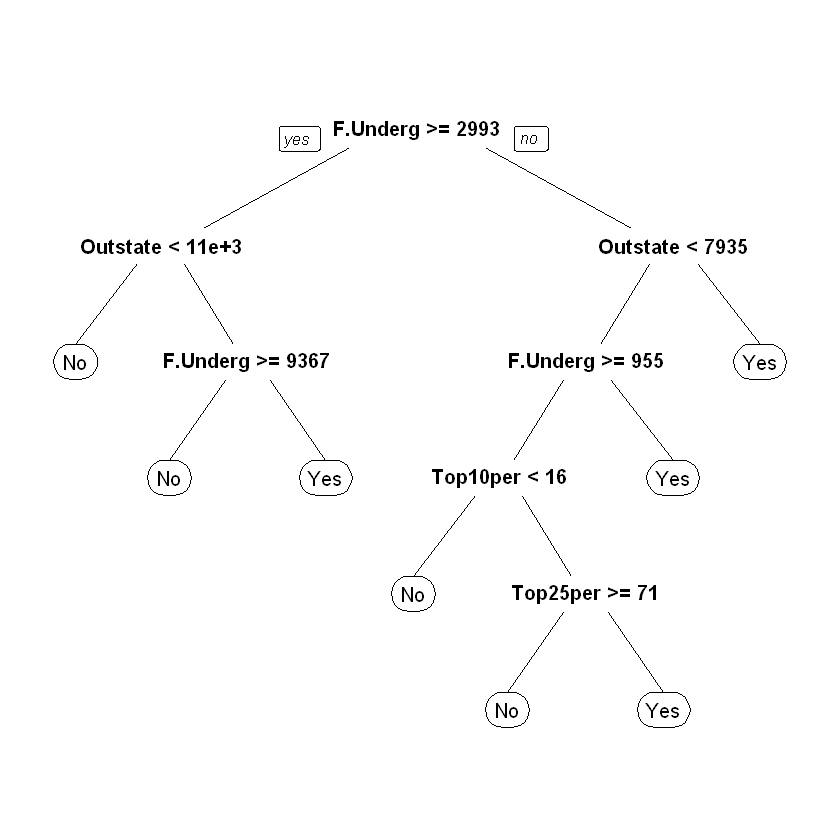

In [108]:
prp(tree)